In [1]:
from main import *

# Preprocessing

## Set the paths based on your Drive directory

In [2]:

data_dir ='data' # Change to the path to your directory
train_images_dir = os.path.join(data_dir, 'Training')
test_images_dir = os.path.join(data_dir, 'Testing')
print(f"Data directory: {data_dir}")
print(f"Training directory: {train_images_dir}")
print(f"Testing directory: {test_images_dir}")

Data directory: data
Training directory: data/Training
Testing directory: data/Testing


## Preprocessing


### Don't touch this block

In [3]:
# Load the training and test data
try:
    train_data, test_data = get_images(train_images_dir, test_images_dir)
    print("Data loading completed successfully.")
    print(f"Number of training samples: {train_data.samples}")
    print(f"Number of test samples: {test_data.samples}")
    print(f"Class names: {train_data.class_indices}")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Data loading completed successfully.
Number of training samples: 5712
Number of test samples: 1311
Class names: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


# Training, validation, and test set

In [4]:
X_train, y_train, X_val, y_val = train_val_split(train_data)
X_test, y_test = test_splits(test_data)

Number of batches in the training data: 179
Batch size of a single batch 32
Number of samples in the training dataset 5712

Number of training data batches with val split of 0.2: 144
Number of validation data batches: 35



2024-09-27 00:45:12.495787: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-09-27 00:45:12.495812: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-09-27 00:45:12.495822: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-09-27 00:45:12.495835: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-27 00:45:12.495845: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Shape of image training set: (4608, 30, 30, 1)
Shape of image validation set: (1104, 30, 30, 1)

Shape of label training set: (4608, 4)
Shape of label validation set: (1104, 4)
Number of batches in the test data: 41
Batch size of a single batch 32
Number of samples in the test dataset 1311

Shape of image test set: (1311, 30, 30, 1)

Shape of label test set: (1311, 4)


# model Model

In [5]:
class_names_train = list(train_data.class_indices.keys())
class_names_test = list(test_data.class_indices.keys())

# Hyper parameter tuning
dense units, filters, kernels, max pooling, activation, LR are all tuneable

In [6]:
def hyperparam(activation = 'relu'):
    

    model = Sequential()
    model.add(Input(shape = (30, 30, 1)))

    model.add(layers.Conv2D(128, (3, 3), activation=activation, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation=activation, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    model.add(layers.Conv2D(32, (3, 3), activation=activation, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(16, (3, 3), activation= activation, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(2, 2))

    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation=activation))
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(32, activation = activation))
    model.add(layers.Dropout(rate = 0.25))
    model.add(layers.Dense(16, activation = activation))
    model.add(layers.Dense(4, activation = "softmax"))

    model.compile(optimizer = optimizers.Adam(learning_rate= 0.001), 
                loss = "categorical_crossentropy",
                metrics = ["accuracy",
                            "precision",
                            "recall",
                            "F1Score"])



    

    return model

hyper = hyperparam()

early_stopping = callbacks.EarlyStopping(monitor= 'val_loss', patience = 10, start_from_epoch= 20, restore_best_weights= True)
hyper_history = hyper.fit(X_train, y_train, batch_size =4, epochs = 50, validation_data = (X_val, y_val), verbose = 1, callbacks= early_stopping)

Epoch 1/50


2024-09-27 00:45:14.523961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1152/1152 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - F1Score: 0.3965 - accuracy: 0.4086 - loss: 1.3449 - precision: 0.5141 - recall: 0.2072 - val_F1Score: 0.6050 - val_accuracy: 0.6377 - val_loss: 0.8072 - val_precision: 0.8203 - val_recall: 0.4176
Epoch 2/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - F1Score: 0.5767 - accuracy: 0.6058 - loss: 0.9374 - precision: 0.7147 - recall: 0.4361 - val_F1Score: 0.7031 - val_accuracy: 0.7518 - val_loss: 0.6180 - val_precision: 0.8456 - val_recall: 0.6250
Epoch 3/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - F1Score: 0.6557 - accuracy: 0.6783 - loss: 0.7868 - precision: 0.7563 - recall: 0.5788 - val_F1Score: 0.7393 - val_accuracy: 0.7609 - val_loss: 0.6448 - val_precision: 0.8320 - val_recall: 0.6413
Epoch 4/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - F1Score: 0.6928 - accuracy: 0.7118 - loss: 0.6906 - precision: 0.7710 - recall: 0.6369 - val_F1Score: 0.7073 - val_accuracy: 0.7491 - val_loss: 0.6144 - val_precision: 0.7869 - val_recall: 0.

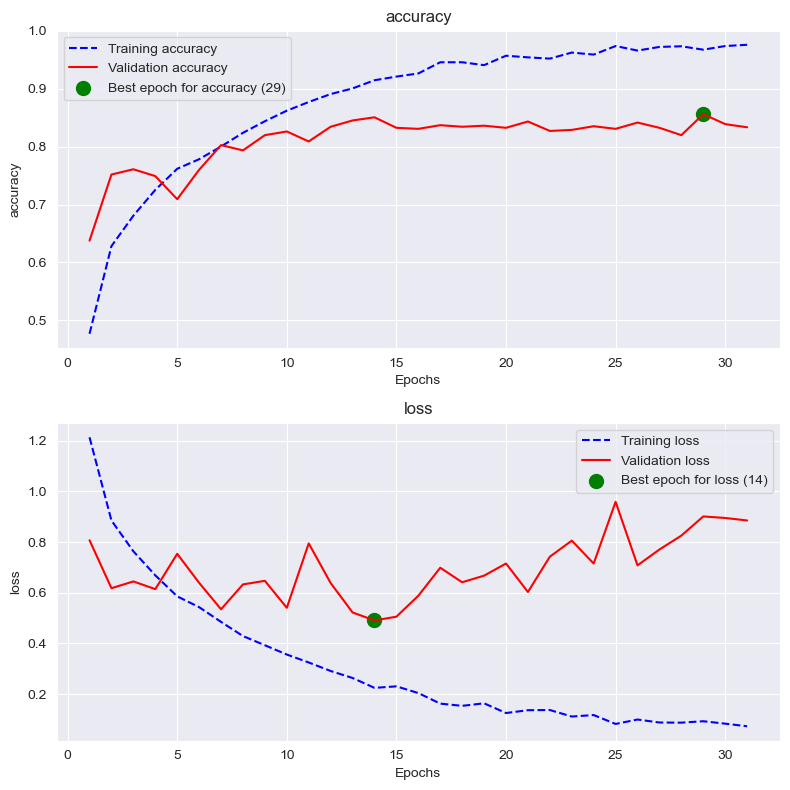

AttributeError: 'History' object has no attribute 'predict'

In [8]:
summarize_metric(hyper_history)

plot_roc_curve(hyper, X_val, y_val, class_names_train)
plot_confusion_matrix(hyper, X_val, y_val, class_names_train, normalize=False)

plot_roc_curve(hyper, X_test, y_test, class_names_test)
plot_confusion_matrix(hyper, X_test, y_test, class_names_test, normalize=False)